In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import requests
master_table = pd.DataFrame({"Race": [], "Date": [], "Winner": [], "Constructor": [], "Laps": []})


In [2]:
import matplotlib.pyplot as plt

In [3]:
year = 1950
while year <= 2020:
    URL = "https://www.formula1.com/en/results.html/{}/races.html".format(year)
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    
    table = soup.find("table", class_ = "resultsarchive-table")
    data = table.tbody.find_all("tr")
    
    race_lst = []
    date_lst = []
    winner_lst = []
    constructor_lst = []
    laps_lst = []

    for item in data:
        row = item.find_all("td")
        race = row[1].find("a", class_ = "dark bold ArchiveLink").text
        race = race.replace('\n', '').strip()
        date = row[2].text
        winner = row[3].find_all("span")[1].text
        constructor = row[4].text
        laps = row[5].text
 
        race_lst.append(race)
        date_lst.append(date)
        winner_lst.append(winner)
        constructor_lst.append(constructor)
        laps_lst.append(laps)
        
    year_table = pd.DataFrame({"Race": race_lst, "Date": date_lst, "Winner": winner_lst, "Constructor": constructor_lst, "Laps": laps_lst})
  
    master_table = master_table.append(year_table)
    #pd.concat([master_table, year_table], ignore_index = True) 
    year = year + 1
    
    

In [4]:
master_table = master_table.drop(index = 0)

In [5]:
master_table = master_table.reset_index(drop=True)

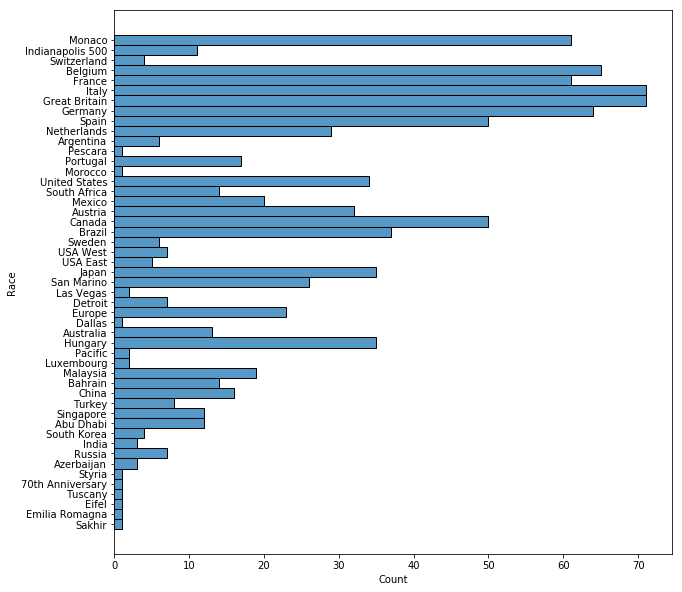

In [6]:
plt.figure(figsize = (10,10))
sns.histplot(data = master_table, y = "Race")

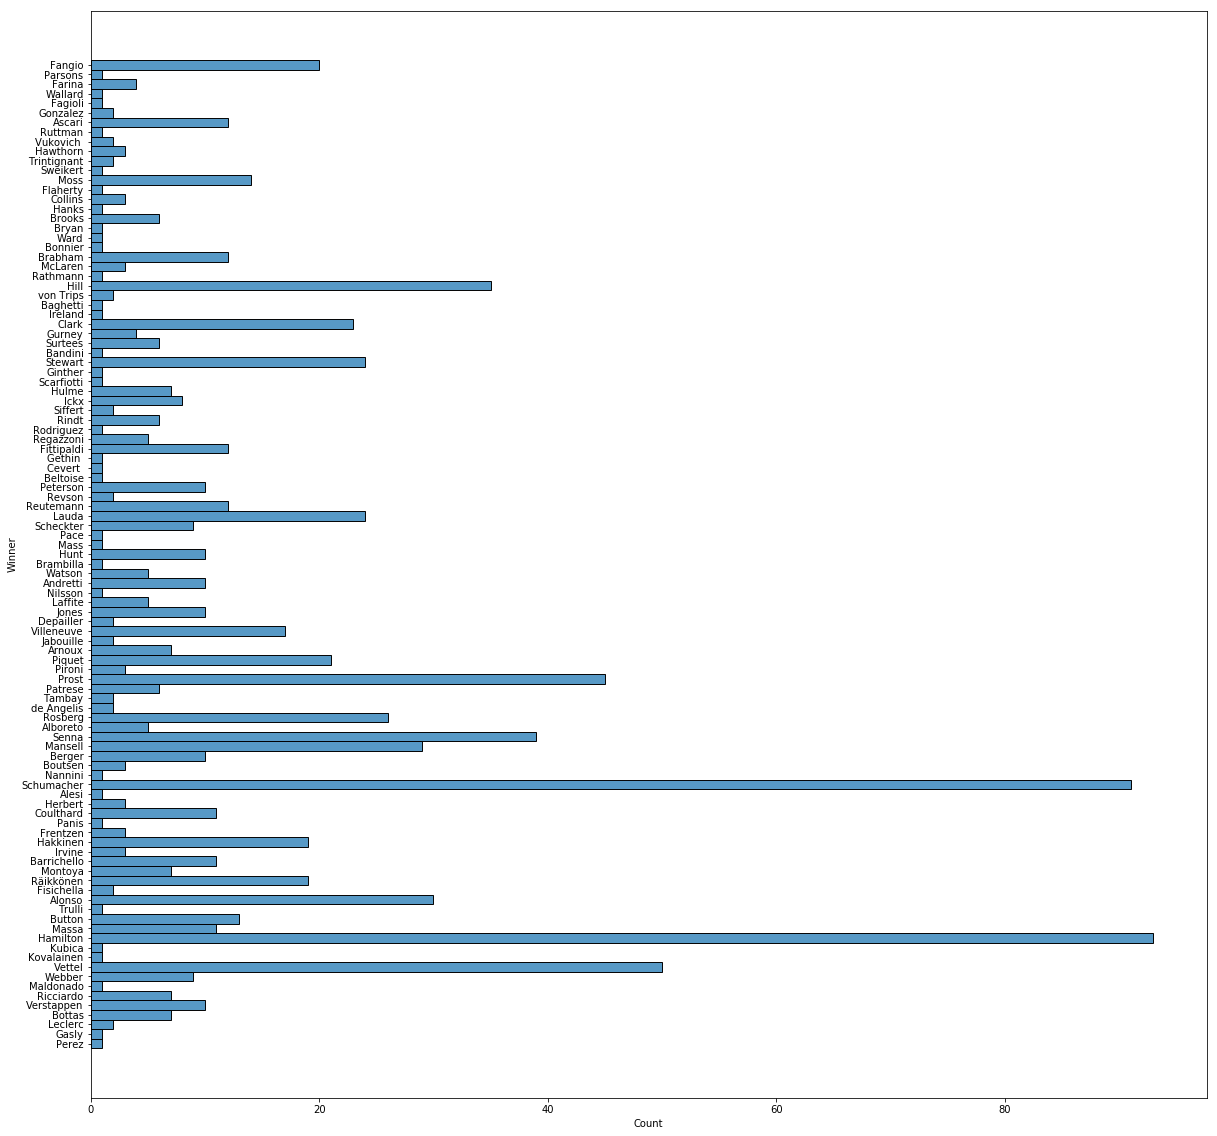

In [7]:
plt.figure(figsize = (20,20))
sns.histplot(data = master_table, y = "Winner")

In [12]:
master_table

,Race,Date,Winner,Constructor,Laps
0,Monaco,21 May 1950,Fangio,Alfa Romeo,100
1,Indianapolis 500,30 May 1950,Parsons,Kurtis Kraft Offenhauser,138
2,Switzerland,04 Jun 1950,Farina,Alfa Romeo,42
3,Belgium,18 Jun 1950,Fangio,Alfa Romeo,35
4,France,02 Jul 1950,Fangio,Alfa Romeo,64
5,Italy,03 Sep 1950,Farina,Alfa Romeo,80
6,Indianapolis 500,30 May 1951,Wallard,Kurtis Kraft Offenhauser,200
7,Belgium,17 Jun 1951,Farina,Alfa Romeo,36
8,France,01 Jul 1951,Fangio,Alfa Romeo,77
9,France,01 Jul 1951,Fagioli,Alfa Romeo,null


In [9]:
master_table["Winner"].head()

0     Fangio
1    Parsons
2     Farina
3     Fangio
4     Fangio
Name: Winner, dtype: object

In [10]:
winners_dict = {}
for racer in master_table["Winner"]:
    if racer not in winners_dict:
        winners_dict[racer] = 1
    else:
        winners_dict[racer] = winners_dict[racer] + 1

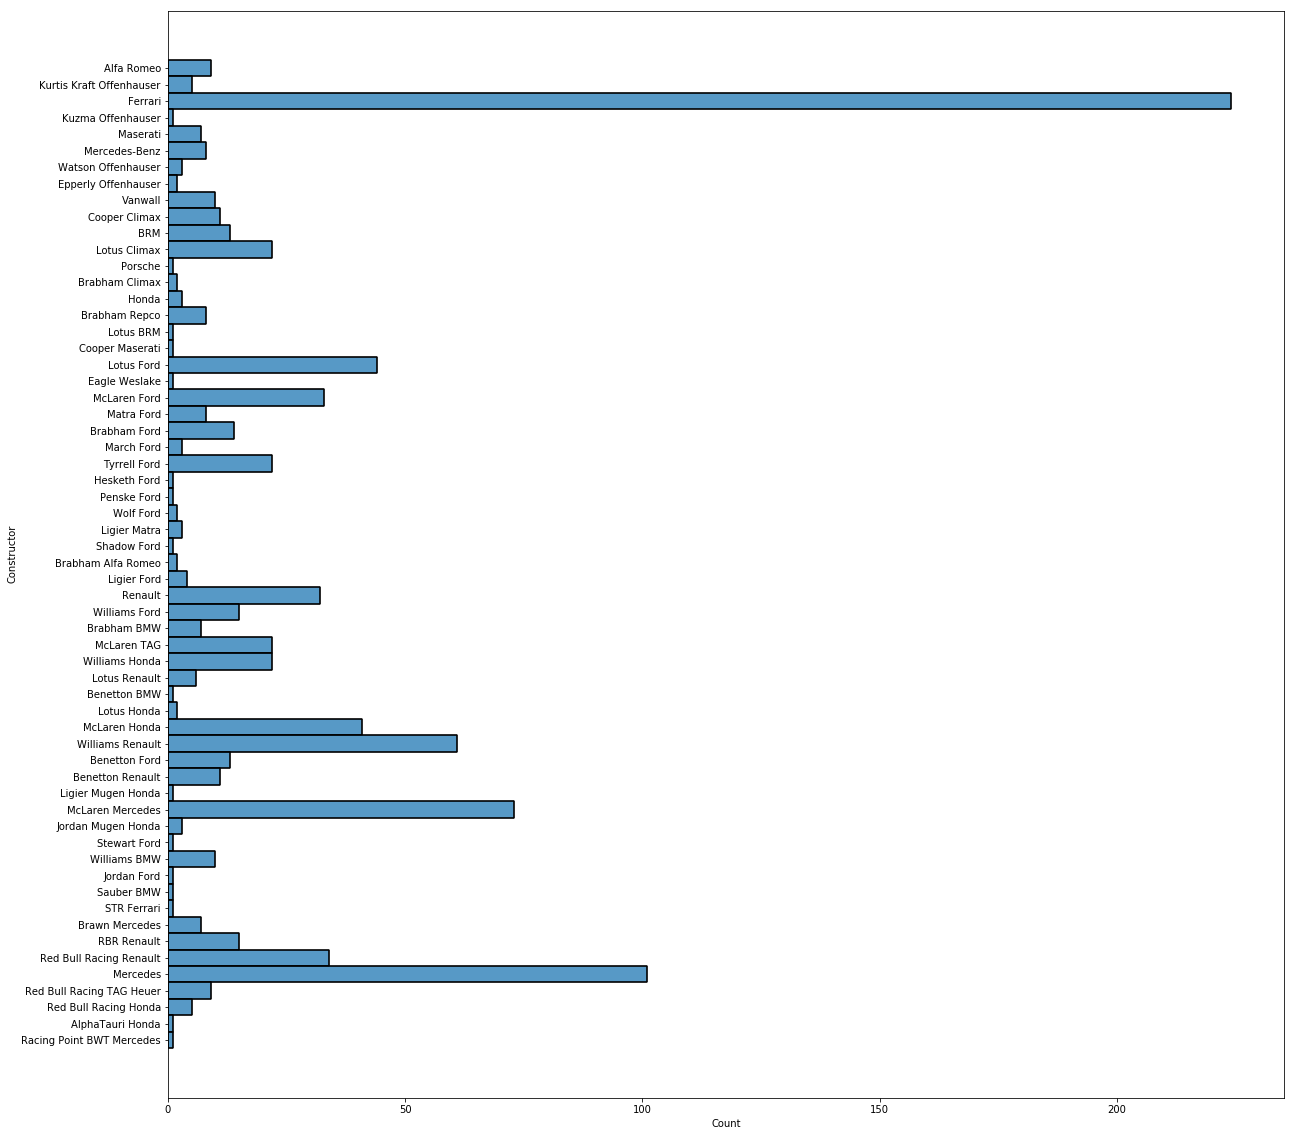

In [13]:
plt.figure(figsize = (20,20))
sns.histplot(data = master_table, y = "Constructor")